In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statistics

In [5]:
sehwag = pd.read_csv("sehwag.csv")
dravid = pd.read_csv("dravid.csv")

In [6]:
sehwag.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,1,5,2,0,0,50.00,7,lbw,1,NaN,v Pakistan,Mohali,1 Apr 1999,ODI # 1427
1,19,18,24,0,1,79.16,6,caught,1,NaN,v Zimbabwe,Rajkot,14 Dec 2000,ODI # 1660
2,58,62,54,8,0,107.40,6,bowled,1,NaN,v Australia,Bengaluru,25 Mar 2001,ODI # 1696
3,2,7,7,0,0,28.57,6,caught,2,NaN,v Zimbabwe,Bulawayo,27 Jun 2001,ODI # 1730
4,11,19,16,1,0,68.75,6,not out,2,NaN,v West Indies,Bulawayo,30 Jun 2001,ODI # 1731


In [7]:
sehwag.shape

(245, 14)

In [9]:
p_25 = sehwag["Runs"].quantile(0.25) #Q1 or p_25
p_50 = sehwag["Runs"].quantile(0.50) #Q2 or p_50
p_75 = sehwag["Runs"].quantile(0.75) #Q3 or p_75


In [10]:
print(p_25, p_50, p_75)

8.0 23.0 46.0


In [11]:
iqr = p_75 - p_25
iqr

38.0

In [14]:
lower = max(p_25 - 1.5*iqr, 0)

upper = p_75 + 1.5*iqr

In [15]:
print(lower, upper)

0 103.0


In [17]:
sehwag_typical = sehwag[(sehwag["Runs"] >= lower) & (sehwag["Runs"] <= upper)]
sehwag_outliers = sehwag[(sehwag["Runs"] < lower) | (sehwag["Runs"] > upper)]

In [18]:
len(sehwag_typical)/len(sehwag)

0.9428571428571428

In [19]:
len(sehwag_outliers)/len(sehwag)

0.05714285714285714

~ 6 % of the times sehwag is acting as an outlier

In [21]:
sehwag["Runs"].max()

219

In [22]:
dravid.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,3,-,4,0,0,75.00,4,caught,1,NaN,v Sri Lanka,Singapore,3 Apr 1996,ODI # 1089
1,4,-,7,0,0,57.14,4,run out,1,NaN,v Pakistan,Singapore,5 Apr 1996,ODI # 1091
2,3,-,5,0,0,60.00,5,caught,2,NaN,v Pakistan,Sharjah,12 Apr 1996,ODI # 1094
3,11,28,21,0,0,52.38,8,caught,2,NaN,v South Africa,Sharjah,14 Apr 1996,ODI # 1097
4,22,21,15,3,0,146.66,6,not out,1,NaN,v England,Manchester,26 May 1996,ODI # 1104


In [23]:
dravid.shape

(318, 14)

In [24]:
p_25 = dravid["Runs"].quantile(0.25) #Q1 or p_25
p_50 = dravid["Runs"].quantile(0.50) #Q2 or p_50
p_75 = dravid["Runs"].quantile(0.75) #Q3 or p_75


In [25]:
print(p_25, p_50, p_75)

10.0 26.0 54.0


In [26]:
iqr = p_75 - p_25
iqr

44.0

In [27]:
lower = max(p_25 - 1.5*iqr, 0)

upper = p_75 + 1.5*iqr

In [28]:
print(lower, upper)

0 120.0


In [29]:
dravid_typical = dravid[(dravid["Runs"] >= lower) & (dravid["Runs"] <= upper)]
dravid_outliers = dravid[(dravid["Runs"] < lower) | (dravid["Runs"] > upper)]

In [30]:
len(dravid_typical)/len(dravid)

0.9905660377358491

In [31]:
len(dravid_outliers)/len(dravid)

0.009433962264150943

~ 1 % of the times dravid is acting as an outlier

In [32]:
dravid["Runs"].max()

153

<AxesSubplot:>

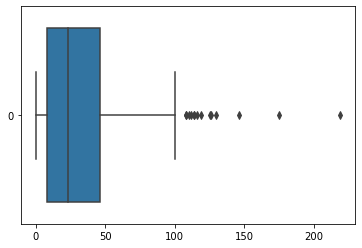

In [33]:
sns.boxplot(data = sehwag["Runs"], orient="h")

<AxesSubplot:>

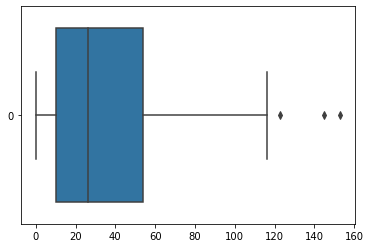

In [34]:
sns.boxplot(data = dravid["Runs"], orient="h")

In [39]:
sehwag["Runs"].quantile(0.10) # decile 0-10 , 10-20, 20-30, 

2.0

## Quiz

In [41]:
salaries = pd.Series([30,32,35,35,38])

def five_point_summary(x):
    
    mean = np.mean(x)
    median = np.median(x)
    mode = statistics.mode(x)
    Range = np.max(x) - np.min(x)
    IQR = np.percentile(x, 0.75) - np.percentile(x, 0.25)
    
    print("mean : ", mean)
    print("median : ", median)
    print("mode : ", mode)
    print("range : ", Range)
    print("iqr : ", IQR)

In [42]:
five_point_summary(salaries)

mean :  34.0
median :  35.0
mode :  35
range :  8
iqr :  0.03999999999999915


In [43]:
five_point_summary(salaries + 5)

mean :  39.0
median :  40.0
mode :  40
range :  8
iqr :  0.03999999999999915


In [44]:
five_point_summary(salaries * 5)

mean :  170.0
median :  175.0
mode :  175
range :  40
iqr :  0.20000000000001705
